In [3]:
import logomaker
import numpy as np
import pandas as pd
import glob
from Bio import AlignIO
import matplotlib.pyplot as plt
import matplotlib
font = {'size': 15}
matplotlib.rc('font', **font)

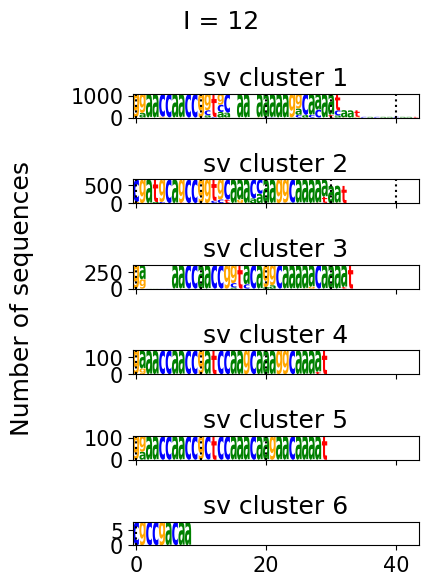

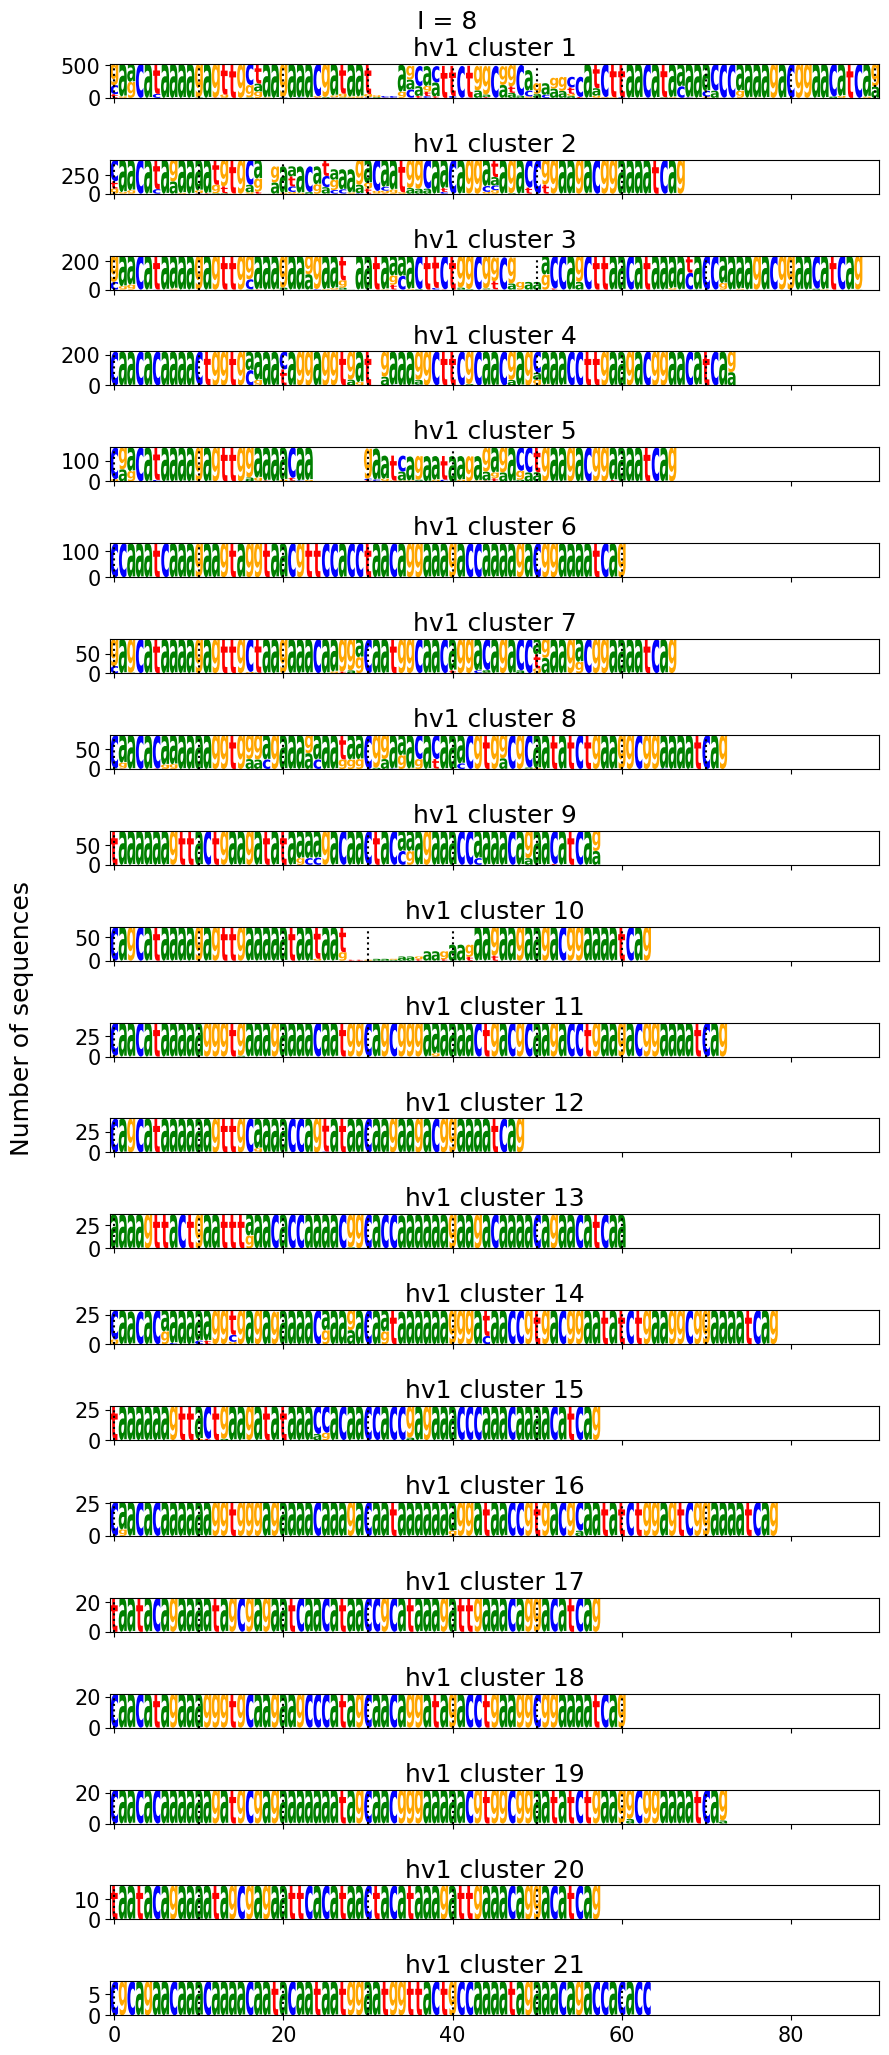

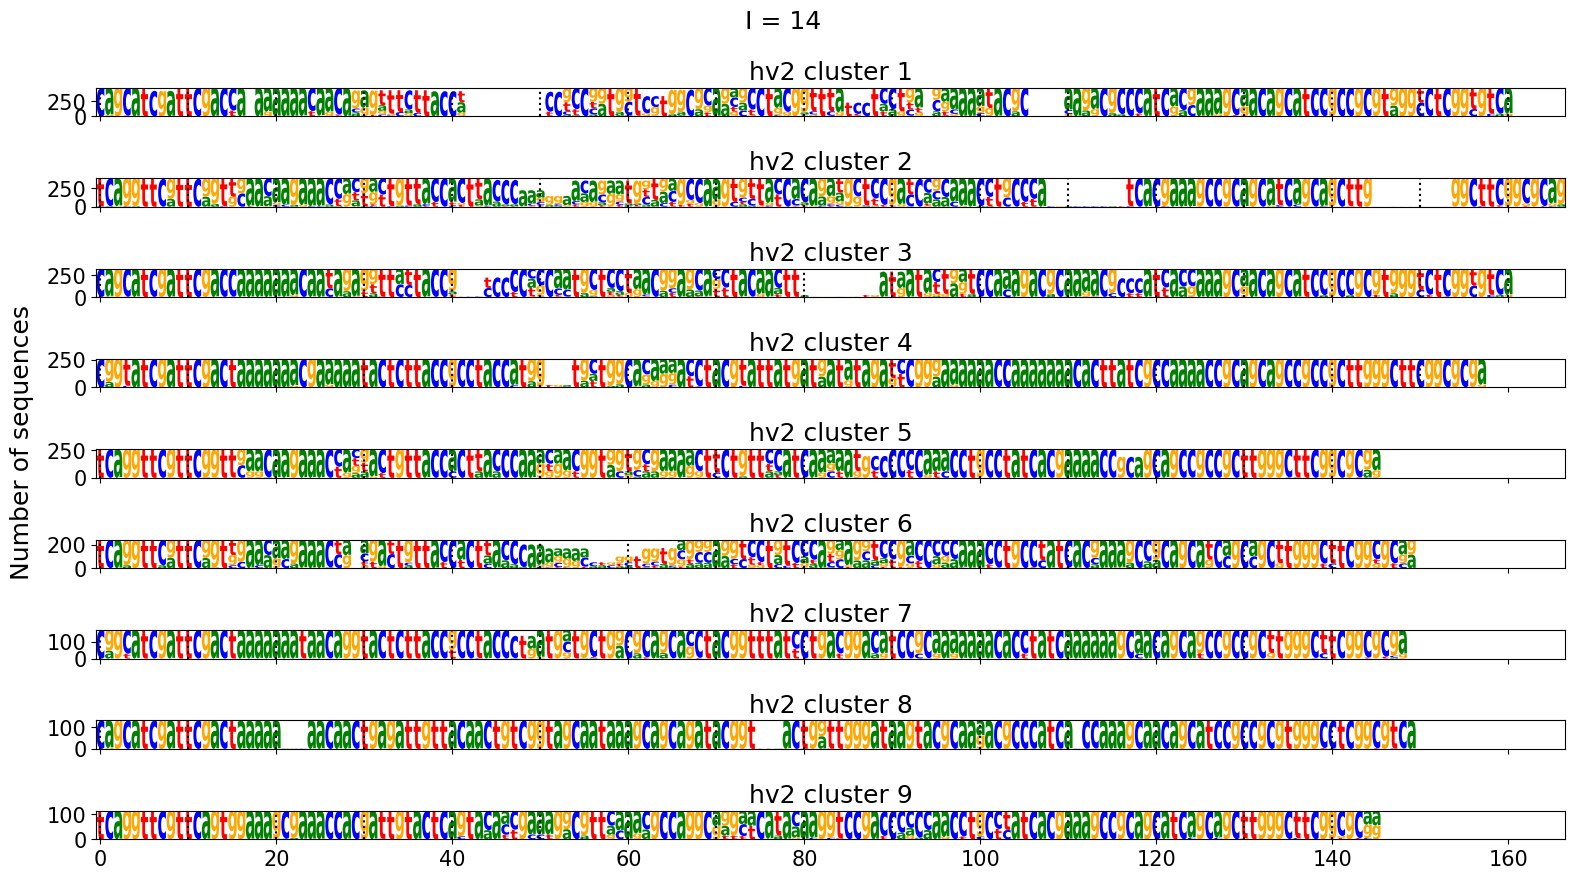

In [5]:
def plot_seq_logo(aln_filenames_dict, region, inflation):
    aln = AlignIO.read(open(list(aln_filenames_dict.values())[0]), 'fasta')

    fig, ax = plt.subplots(len(aln_filenames_dict), 1, figsize = (len(aln[0])/10,len(aln_filenames_dict)), sharex = True)
    i = 0
    
    xmin = []
    xmax = []
    for cluster_num in aln_filenames_dict:
        aln_filename = aln_filenames_dict[cluster_num]
        
        # Read in alignment
        aln = AlignIO.read(open(aln_filename), 'fasta')
        ids = []
        seqs = []
        for record in aln:
            ids.append(record.id)
            seqs.append(str(record.seq))
        
        if len(aln_filenames_dict) == 1:
            axis = ax
        else:
            axis = ax[i]
            
        # Make sequence logo
        logo_matrix = logomaker.alignment_to_matrix(sequences=seqs)
        logomaker.Logo(logo_matrix, ax = axis, color_scheme = 'classic')
        axis.set_title(region + ' cluster ' + str(cluster_num))

        xlim = axis.get_xlim()
        ylim = axis.get_ylim()

        xmin.append(xlim[0])
        xmax.append(xlim[1])
        for x in np.arange(0, xlim[1], 10):
            axis.plot([x, x], [ylim[0],ylim[1]], 'k:')

        i+=1
    
    if len(aln_filenames_dict) == 1:
        ax.set_xlim([min(xmin), max(xmax)])
    else:
        ax[0].set_xlim([min(xmin), max(xmax)])
    
    fig.supylabel('Number of sequences')
    fig.suptitle('I = ' + str(int(inflation)))
    plt.tight_layout()
    plt.show()
    
    return fig, ax

regions = {'sv':12, 'hv1':8, 'hv2':14}
for region in regions:
    inflation = regions[region]
    
    # Get the alignment filenames for each cluster
    aln_filenames = glob.glob('../../results/mcl/cluster_alignments/'+ region + '_I' + str(int(inflation*10)) + '_cluster_*.fa.aln')
    aln_filenames_dict = {}
    for aln_filename in aln_filenames:
        basename = aln_filename.split('/')[-1]
        cluster_num = int(basename[basename.find('cluster_')+8:basename.find('.fa.aln')])
        aln_filenames_dict[cluster_num] = aln_filename
    aln_filenames_dict = dict(sorted(aln_filenames_dict.items()))
    
    # Plot sequence logo
    fig, ax = plot_seq_logo(aln_filenames_dict, region, inflation)
    
    # Save figure
    fig.savefig('../../figures/clusters/mcl_cluster_sequence_logo_' + region + '_I' + str(int(inflation*10)) + '.png', dpi = 300)
    fig.savefig('../../figures/clusters/mcl_cluster_sequence_logo_' + region + '_I' + str(int(inflation*10)) + '.pdf')